***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 3**

***Problem 3.X***


***problem text***

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [2]:
datafile = pd.read_csv('data/Refractive index silicon.csv', index_col=0, header=0) 
datafile

,n_Si_25C
nm,NaN
250,1.6640
260,1.7540
270,2.0870
280,2.9610
...,...
1410,3.4928
1420,3.4917
1430,3.4906
1440,3.4896


In [3]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexees to float for easy operation


We start by calculating the total irradiance AM0, AM1.5G and AM1.5D.

We start calculate the UV content in AM0, AM1.5G and AM1.5D.

We define the relevant constants. 

In [5]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

In [6]:
QE = pd.read_csv('data/QE_Silicon.csv', index_col=0, header=0) 
QE

,QE Silicon Solar cell
nm,
305,0.185579
310,0.243200
315,0.298992
320,0.353041
325,0.405425
...,...
1130,0.081951
1135,0.067769
1140,0.053712


We plot the Quantum Efficiency and Spectral Response

In [7]:
SR=pd.Series(index=QE.index,
            data=[QE.loc[i,'QE Silicon Solar cell']*e*i*0.000000001/(h*c) for i in QE.index])

,QE Silicon Solar cell
nm,
305,0.185579
310,0.243200
315,0.298992
320,0.353041
325,0.405425
...,...
1130,0.081951
1135,0.067769
1140,0.053712


Text(0.5, 0, 'Wavelength (nm)')

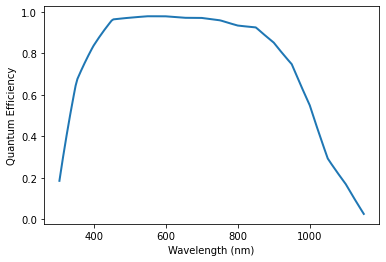

In [165]:
plt.plot(QE, 
         linewidth=2)
plt.ylabel('Quantum Efficiency')
plt.xlabel('Wavelength (nm)')

Text(0.5, 0, 'Wavelength (nm)')

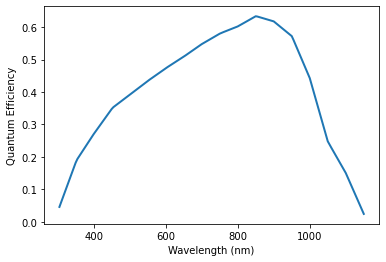

In [166]:
plt.plot(SR, 
         linewidth=2)
plt.ylabel('Quantum Efficiency')
plt.xlabel('Wavelength (nm)')

***(c) Estimate the photocurrent generated by a Silicon solar cell illuminated by the refer-ence spectrum AM1.5 G***

First, we need to interpolate the spectra at those datapoints included in the SR. 

In [170]:
spectra=datafile['AM1.5G']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

array([0.0165, 0.0509, 0.136 , 0.205 , 0.279 , 0.471 , 0.464 , 0.502 ,
       0.459 , 0.528 , 0.611 , 0.598 , 0.624 , 0.755 , 0.589 , 0.701 ,
       0.674 , 0.797 , 0.808 , 1.11  , 1.15  , 1.05  , 1.23  , 1.12  ,
       1.25  , 0.875 , 1.25  , 1.35  , 1.46  , 1.56  , 1.52  , 1.53  ,
       1.54  , 1.51  , 1.62  , 1.62  , 1.57  , 1.62  , 1.65  , 1.55  ,
       1.56  , 1.55  , 1.53  , 1.52  , 1.58  , 1.54  , 1.55  , 1.48  ,
       1.54  , 1.54  , 1.56  , 1.47  , 1.52  , 1.48  , 1.48  , 1.5   ,
       1.53  , 1.37  , 1.43  , 1.48  , 1.49  , 1.47  , 1.47  , 1.47  ,
       1.4   , 1.39  , 1.45  , 1.43  , 1.46  , 1.36  , 1.35  , 1.4   ,
       1.42  , 1.42  , 1.4   , 1.4   , 1.37  , 1.18  , 1.27  , 1.28  ,
       1.32  , 1.32  , 1.26  , 0.986 , 1.04  , 1.13  , 1.22  , 1.22  ,
       1.25  , 1.23  , 1.24  , 0.266 , 0.686 , 1.16  , 1.18  , 1.16  ,
       1.16  , 1.09  , 1.09  , 1.07  , 1.05  , 1.06  , 0.895 , 0.862 ,
       0.969 , 0.916 , 1.    , 1.02  , 1.02  , 0.894 , 0.913 , 0.988 ,
      

Then, we calculate the integral

$J=\int G(\lambda)·SR(\lambda) d \lambda$

In [181]:
I = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(I.round(1)) + ' mA/cm2')

Photocurrent density = 36.73mA/cm2
